# Problema 4

In [64]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%run lib.ipynb
%matplotlib inline

In [257]:
def ec_mov(r_v, t, g = 0.0, m = 1.):
    """
    r_v contiene r, theta, r punto, theta punto
    ecuacion de movimiento con gravedad radial
    """
    dx = r_v[2]
    dy = r_v[3]
    r = norm(r_v[:2])
    dvx = 0
    dvy = g/m
    return array([dx,dy,dvx,dvy])

In [73]:
def rebote_cascaron(r_v_i,mi_dt,limit,caso,tol=1e-4,**kwargs):    
    dt_busqueda = mi_dt/2
    y0 = r_v_i
    t,sol = int_rk4(ec_mov,y0,[0,dt_busqueda],**kwargs)
    y1 = sol[-1,:]
    r0, r1 = norm(y0[:2]), norm(y1[:2])
    while abs(r0-limit) > tol:
        if   caso=="int" and r1 < limit:
            reinicio = y0
        elif caso=="ext" and r1 > limit:
            reinicio = y0
        else:
            reinicio = y1
        dt_busqueda = dt_busqueda/2
        t,sol = int_rk4(ec_mov,reinicio,[0,dt_busqueda],**kwargs)
        y0, y1 = reinicio, sol[-1,:]
        r0 = np.sqrt(y0[0]**2+y0[1]**2)
        r1 = np.sqrt(y1[0]**2+y1[1]**2)        
    # rebote radial
    p = 1 if caso=="ext" else -1
    V = norm(y0[2:])
    alpha = np.arctan((y0[1])/(y0[0]))
    # se puede reducir a dos casos, pero lo dejo ahora por claridad
    if   y0[3]>0 and y0[2]<0:
        gamma = np.pi+np.arctan((y0[3])/(y0[2])) if not np.isclose(0.0,y0[2]) else p*np.pi/2
    elif y0[3]<0 and y0[2]<0:
        gamma = np.pi+np.arctan((y0[3])/(y0[2])) if not np.isclose(0.0,y0[2]) else p*np.pi/2
    elif y0[3]<0 and y0[2]>0:
        gamma = np.arctan((y0[3])/(y0[2])) if not np.isclose(0.0,y0[2]) else p*np.pi/2              
    else:
        gamma = np.arctan((y0[3])/(y0[2])) if not np.isclose(0.0,y0[2]) else p*np.pi/2   
    y0[3] = V*np.sin(np.pi+2*alpha-gamma)
    y0[2] = V*np.cos(np.pi+2*alpha-gamma)
    return y0

In [229]:
def random_start(r,v):
    x, y = np.random.uniform(low=-2*r,high=2*r,size=(2))
    vx, vy = np.random.uniform(low=-v,high=v,size=(2))
    while not r*1.01<norm([x,y])<2*r*0.99:
        x, y = np.random.uniform(low=-2*r,high=2*r,size=(2))
    return np.array([x,y,vx,vy])

## (A) Algunos rebotes

Damos una condición inicial ''arbitraria'', que nos da una trayectoria cerrada bien bonita.

In [245]:
N=1000-16
a, grav, mi_dt = 4, -0, 0.1
inicio = [2,5,-1.2014,-1.0]
trayectoria=zeros((N,len(inicio)))
trayectoria[0,:]=array(inicio)

for i in range(N-1):
    t,sol = int_rk4(ec_mov,trayectoria[i,:],[0,mi_dt],g=grav)
    y, r = sol[-1,:], norm(sol[-1][:2])
    #condicion interno
    if   r <   a:
        y = rebote_cascaron(trayectoria[i,:],mi_dt,  a,"int",tol=1e-4,g=grav)
    # condicion externo 
    elif r > 2*a:
        y = rebote_cascaron(trayectoria[i,:],mi_dt,2*a,"ext",tol=1e-4,g=grav)
    trayectoria[i+1,:] = y

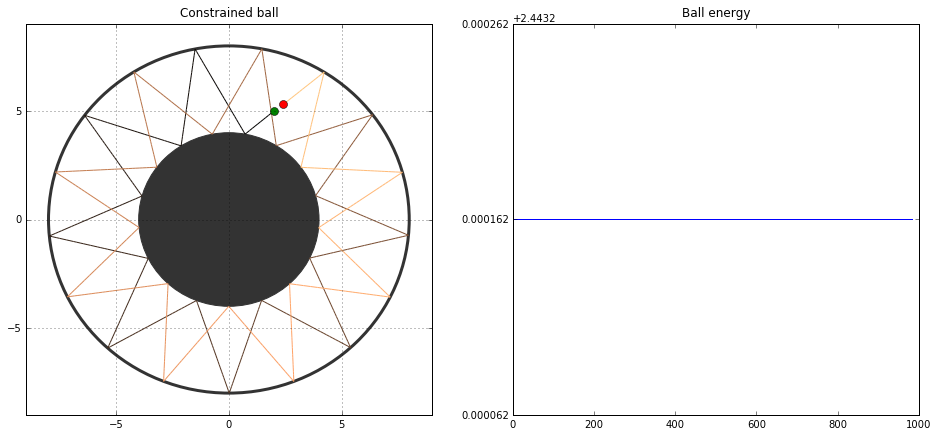

In [246]:
fig = plt.figure(figsize=(16,7))

ax = fig.add_subplot(121)
ax.grid(True)

# punto
colorline(trayectoria[:,0],trayectoria[:,1],cmap='copper', linewidth=1)
plt.plot(trayectoria[0,0],trayectoria[0,1],'o-',c="g",ms=8,alpha=1.0)
plt.plot(trayectoria[-1,0],trayectoria[-1,1],'o-',c="r",ms=8,alpha=1.0)

#circulos
interno = plt.Circle((0, 0),   a, color='#333333')
externo = plt.Circle((0, 0), 2*a, color='#333333', fill=False, linewidth=3)
ax.add_artist(interno)
ax.add_artist(externo)

ax.set_xlim([-2*a-1,+2*a+1]),ax.set_ylim([-2*a-1,+2*a+1])
ax.set_title("Constrained ball", va='bottom');

ax = fig.add_subplot(122)

# energia
E0 = norm(inicio[2:])**2
plt.plot(range(N),norm(trayectoria[:,[2,3]],axis=1)**2,'-')

ax.set_ylim(E0-1e-4,E0+1e-4); ax.set_yticks([E0-1e-4,E0,E0+1e-4]);
ax.set_title("Ball energy", va='bottom');

Arriba, además de la trayectoria, grafico la energía de la partícula a través de cada paso para comprobar que permanece constante.

## (B) Condiciones para encierro: sin gravedad

A continuación, graficare la trayectoria para múltiples condiciones iniciales aleatorias.

In [247]:
N, iteraciones= 1000, 10
a, v, grav, mi_dt = 4, 5, -0, 0.1
sims = {}
# SIMULACIONES #
for n in xrange(iteraciones):
    inicio = random_start(a,v)
    trayectoria=zeros((N,len(inicio)))
    trayectoria[0,:]=array(inicio)
    for i in range(N-1):
        t,sol = int_rk4(ec_mov,trayectoria[i,:],[0,mi_dt],g=grav)
        y, r = sol[-1,:], norm(sol[-1][:2])
        #condicion interno
        if   r <   a:
            y = rebote_cascaron(trayectoria[i,:],mi_dt,  a,"int",tol=1e-4,g=grav)
        # condicion externo 
        elif r > 2*a:
            y = rebote_cascaron(trayectoria[i,:],mi_dt,2*a,"ext",tol=1e-4,g=grav)
        trayectoria[i+1,:] = y
    sims[n] = trayectoria

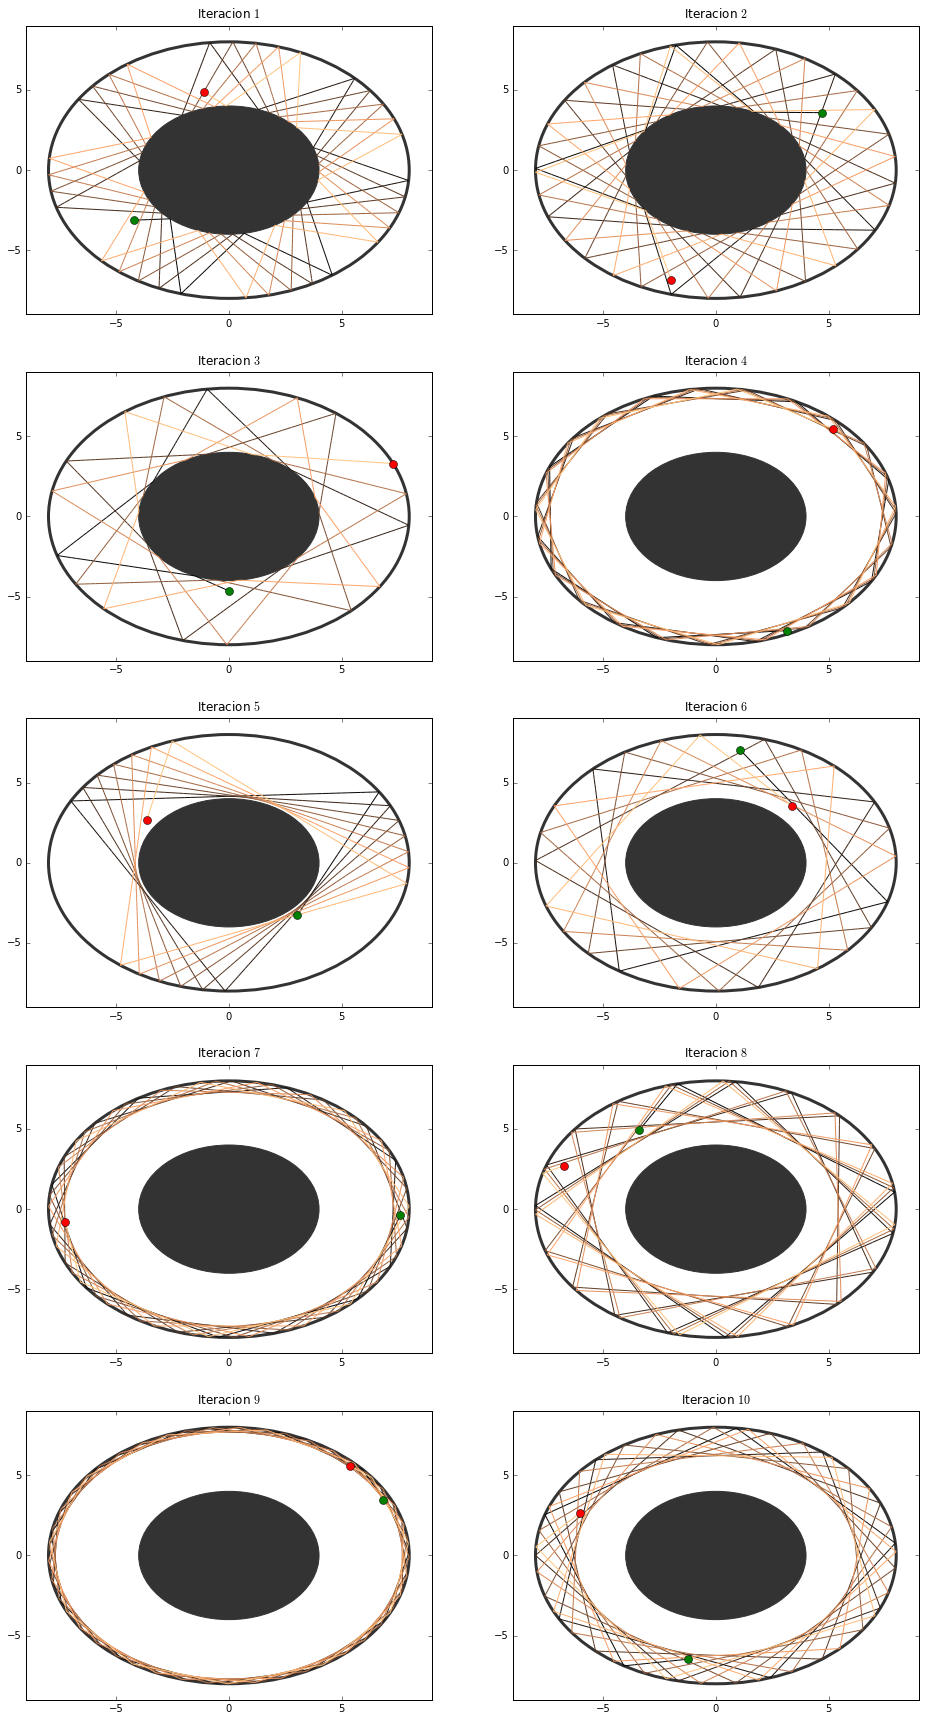

In [248]:
fig = plt.figure(figsize=(16,30))
for n in xrange(iteraciones):
    trayectoria = sims[n]
    # GRAFICAS #
    ax = fig.add_subplot(5,2,n+1)
    # punto
    colorline(trayectoria[:,0],trayectoria[:,1],cmap='copper', linewidth=1)
    plt.plot(trayectoria[0,0],trayectoria[0,1],'o-',c="g",ms=8,alpha=1.0)
    plt.plot(trayectoria[-1,0],trayectoria[-1,1],'o-',c="r",ms=8,alpha=1.0)
    #circulos
    interno = plt.Circle((0, 0),   a, color='#333333')
    externo = plt.Circle((0, 0), 2*a, color='#333333', fill=False, linewidth=3)
    ax.add_artist(interno)
    ax.add_artist(externo)
    ax.set_xlim([-2*a-1,+2*a+1]),ax.set_ylim([-2*a-1,+2*a+1])
    ax.set_title("Iteracion ${}$".format(n+1), va='bottom');  

### Casos patológicos

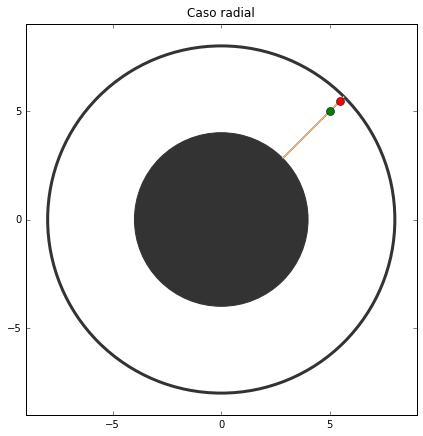

In [250]:
N = 300
a, v, grav, mi_dt = 4, 5, -0, 0.1
sims = {}
# SIMULACION #
inicio = [5,5,1.0,1.0]
trayectoria=zeros((N,len(inicio)))
trayectoria[0,:]=array(inicio)
for i in range(N-1):
    t,sol = int_rk4(ec_mov,trayectoria[i,:],[0,mi_dt],g=grav)
    y, r = sol[-1,:], norm(sol[-1][:2])
    #condicion interno
    if   r <   a:
        y = rebote_cascaron(trayectoria[i,:],mi_dt,  a,"int",tol=1e-4,g=grav)
    # condicion externo 
    elif r > 2*a:
        y = rebote_cascaron(trayectoria[i,:],mi_dt,2*a,"ext",tol=1e-4,g=grav)
    trayectoria[i+1,:] = y
# GRAFICA #    
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
# punto
colorline(trayectoria[:,0],trayectoria[:,1],cmap='copper', linewidth=1)
plt.plot(trayectoria[0,0],trayectoria[0,1],'o-',c="g",ms=8,alpha=1.0)
plt.plot(trayectoria[-1,0],trayectoria[-1,1],'o-',c="r",ms=8,alpha=1.0)
#circulos
interno = plt.Circle((0, 0),   a, color='#333333')
externo = plt.Circle((0, 0), 2*a, color='#333333', fill=False, linewidth=3)
ax.add_artist(interno)
ax.add_artist(externo)
ax.set_xlim([-2*a-1,+2*a+1]),ax.set_ylim([-2*a-1,+2*a+1])
ax.set_title("Caso radial".format(n+1), va='bottom');     

## (c) Con gravedad uniforme

In [260]:
N, iteraciones= 500, 10
a, v, grav, mi_dt = 4, 10, +10, 0.1
sims,starps = {},{}
# SIMULACIONES #
for n in xrange(iteraciones):
    inicio = random_start(a,v)
    trayectoria=zeros((N,len(inicio)))
    trayectoria[0,:]=array(inicio)
    for i in range(N-1):
        t,sol = int_rk4(ec_mov,trayectoria[i,:],[0,mi_dt],g=grav)
        y, r = sol[-1,:], norm(sol[-1][:2])
        #condicion interno
        if   r <   a:
            y = rebote_cascaron(trayectoria[i,:],mi_dt,  a,"int",tol=1e-4,g=grav)
        # condicion externo 
        elif r > 2*a:
            y = rebote_cascaron(trayectoria[i,:],mi_dt,2*a,"ext",tol=1e-4,g=grav)
        trayectoria[i+1,:] = y
    sims[n] = trayectoria
    starps[n] = inicio

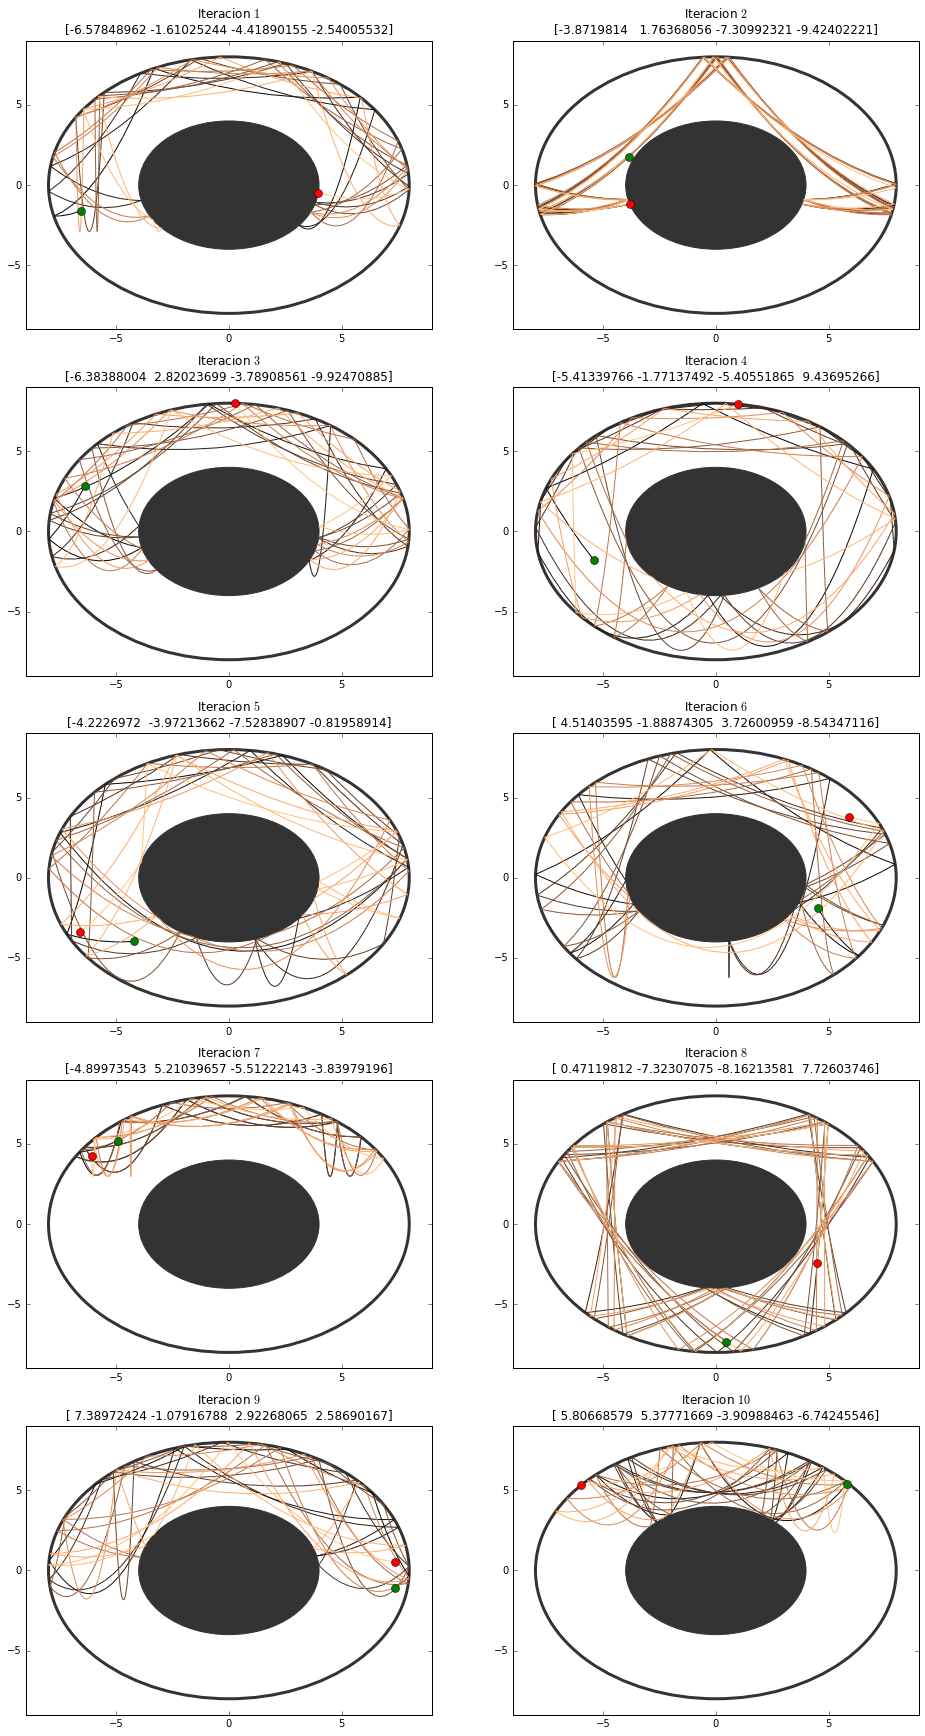

In [261]:
fig = plt.figure(figsize=(16,30))
for n in xrange(iteraciones):
    trayectoria = sims[n]
    # GRAFICAS #
    ax = fig.add_subplot(5,2,n+1)
    # punto
    colorline(trayectoria[:,0],trayectoria[:,1],cmap='copper', linewidth=1)
    plt.plot(trayectoria[0,0],trayectoria[0,1],'o-',c="g",ms=8,alpha=1.0)
    plt.plot(trayectoria[-1,0],trayectoria[-1,1],'o-',c="r",ms=8,alpha=1.0)
    #circulos
    interno = plt.Circle((0, 0),   a, color='#333333')
    externo = plt.Circle((0, 0), 2*a, color='#333333', fill=False, linewidth=3)
    ax.add_artist(interno)
    ax.add_artist(externo)
    ax.set_xlim([-2*a-1,+2*a+1]),ax.set_ylim([-2*a-1,+2*a+1])
    ax.set_title("Iteracion ${}$\n{}".format(n+1,starps[n]), va='bottom'); 

### Animación

## Apendice: condiciones iniciales aleatorias

Una pequeña figura para verificar la estocasticidad de las condiciones iniciales generadas por mi función _random start_.

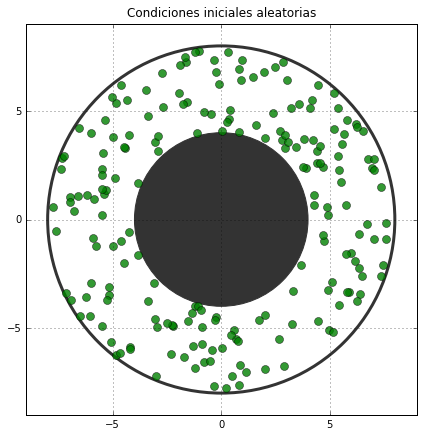

In [231]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
# puntos aleatorios
pts = np.empty((200,2))
for i in range(200):
    pts[i,:] = random_start(a,5,)[:2]
plt.plot(pts[:,0],pts[:,1],'o',c="g",ms=8,alpha=0.8)
#circulos
interno = plt.Circle((0, 0),   a, color='#333333')
externo = plt.Circle((0, 0), 2*a, color='#333333', fill=False, linewidth=3)
ax.add_artist(interno); ax.add_artist(externo)
ax.set_xlim([-2*a-1,+2*a+1]),ax.set_ylim([-2*a-1,+2*a+1]); ax.grid(True)
ax.set_title("Condiciones iniciales aleatorias", va='bottom');